## Data visualisation Drosophila melanogaster - larvas' behavioral tests
- mef - control line
- mefvxCG4190 - RNAi line
#### experiment from master thesis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import scipy.stats as stats
import numpy as np
import seaborn as sns
import glob

In [2]:
def load_csv(file_path):
    return pd.read_csv(file_path, index_col=None, sep=",")

csv = load_csv("summation-mef-beh.csv")
csv.head(10)

,line,p1,p2,p3,o1,o2,o3
0,mef,12,22,18,16,20,43
1,mef,20,30,40,20,6,18
2,mef,29,25,22,24,14,25
3,mef,10,11,9,27,35,21
4,mef,15,20,22,37,68,40
5,mef,24,23,26,23,21,20
6,mef,25,20,25,16,7,10
7,mef,22,21,26,2,17,35
8,mef,16,16,2,17,35,36
9,mef,20,13,21,10,8,9


In [3]:
csv["peristaltic movements per 30 seconds"] = csv[["p1", "p2", "p3"]].mean(axis=1)
csv["righting time"] = csv[["o1", "o2", "o3"]].mean(axis=1)
csv.head(4)

,line,p1,p2,p3,o1,o2,o3,peristaltic movements per 30 seconds,righting time
0,mef,12,22,18,16,20,43,17.333333,26.333333
1,mef,20,30,40,20,6,18,30.000000,14.666667
2,mef,29,25,22,24,14,25,25.333333,21.000000
3,mef,10,11,9,27,35,21,10.000000,27.666667


In [4]:
means = csv[["line", "peristaltic movements per 30 seconds", "righting time"]]
mef_color="crimson"
mef_cg_color = "steelblue"
means.head()

,line,peristaltic movements per 30 seconds,righting time
0,mef,17.333333,26.333333
1,mef,30.000000,14.666667
2,mef,25.333333,21.000000
3,mef,10.000000,27.666667
4,mef,19.000000,48.333333


# T test

In [5]:
exp = ["peristaltic movements per 30 seconds", "righting time"]

for i in exp:
    print(str(i))
    print(ttest_ind(means.loc[0:45, i],
          means.loc[45:, i])[1])

peristaltic movements per 30 seconds
0.7297473259825455
righting time
0.0003685047141668704


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


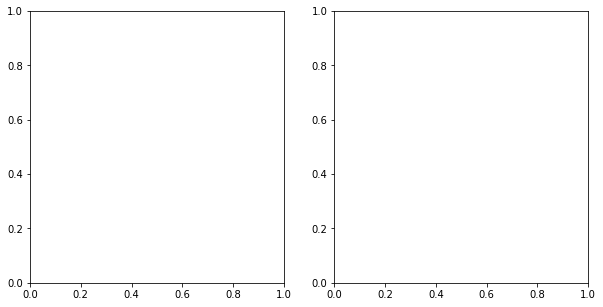

In [6]:
exp = ["peristaltic movements per 30 seconds", "righting time"]
palette="Set1"
def plots(kind):
    
    fig = plt.figure(figsize=(10,5))
    
    axes = fig.subplots(1, 2).flatten()
    for i, y in enumerate(exp):
        p = sns.catplot(data=means, x="line", y=y, kind=kind, ax=axes[i], palette=palette)
        plt.close(p.fig)
        
plots("bar")
# plt.savefig("behavioral_tests_box-mef")

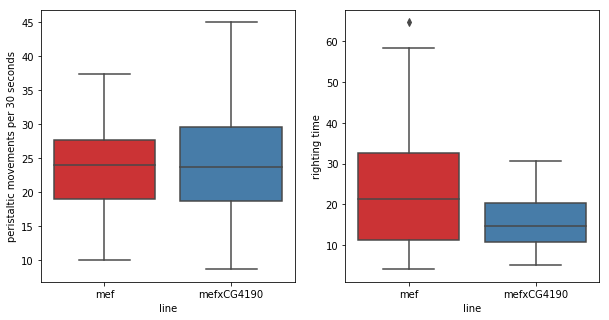

In [7]:
plots("box")
# plt.savefig("behavioral_tests_plot-mef")

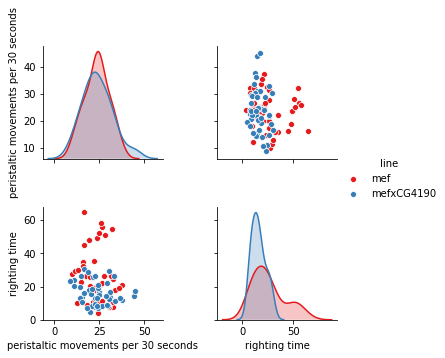

In [8]:
sns.pairplot(means, hue="line", palette=palette)
# plt.savefig("behavioral_tests_comparison-mef")

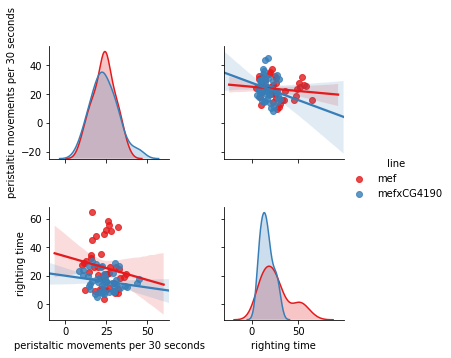

In [9]:
sns.pairplot(means, hue="line", palette=palette, kind="reg")
# plt.savefig("behavioral_tests_comparison-mef")

# przdziały ufności dla predykcji

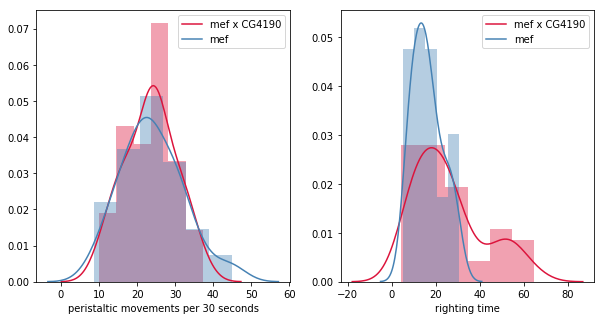

In [10]:
def hists():
    fig = plt.figure(figsize=(10,5))
    axes = fig.subplots(1, 2).flatten()
    for i, y in enumerate(exp):
        bins=10
        p = sns.distplot(means.loc[0:45, y],
            ax=axes[i],
            kde=True,
            #bins=bins,
            color=mef_color,
            kde_kws={"label": "mef x CG4190"});
        
        x = sns.distplot(means.loc[45:, y],
            ax=axes[i],
            kde=True,
            color=mef_cg_color,
           # bins=bins,
            kde_kws={"label": "mef"});
        

hists()
# plt.savefig("behavioral_tests_hists_mef")

In [11]:
mef = means[means["line"]=="mef"]["peristaltic movements per 30 seconds"]
mef_cg = means[means["line"]=="mefxCG4190"]["peristaltic movements per 30 seconds"]
mef = list(mef)
stats.shapiro(mef)


(0.9820739030838013, 0.7042802572250366)